## ROBERT's documentation: 
https://robert.readthedocs.io/en/latest/index.html

## CURATE
The CURATE module offers features to improve data quality. These include the removal of correlated variables, noise, duplicated entries and missing values. 
These options are activated by default to reduce the complexity of the resulting predictors, and users can set specific thresholds for the correlation and noise filters using the "thres_x" and "thres_y" parameters.
Additionally, the module facilitates the conversion of categorical data, transforming columns containing categorical variables into numerical or one-hot encoding values. 

In [ ]:
!python -m robert --names Name --y Target_values --csv_name Robert_example.csv --curate

## GENERATE

The GENERATE module performs an exploration of various combinations ML algorithms and partition sizes. It uses built-in ML models from scikit-learn or its code accelerator, scikit-learn-intelex. 

These models are hyperoptimized using the hyperopt Python module to find their optimal parameters.

In [ ]:
!python -m robert --names Name --y Target_values --csv_name CURATE/Robert_example_CURATE.csv --generate

## VERIFY
The VERIFY model uses the GENERATE models and perform different statistical tests to verify the model's performance.
The test-pass threshold is established through the 'thres_test' option, determined by the percentage of error difference (RMSE by default) relative to the original model. 
The 'kfold' parameter governs the number of folds utilized in cross-validation.

In [ ]:
!python -m robert --names Name --y Target_values --csv_name Robert_example.csv --verify

## PREDICT
The PREDICT module uses models obtained in the GENERATE module to compute various metrics, including R2, MAE, and RMSE (regression), and accuracy, F1 score, and MCC (classification). 
This module also enables predictions for an external test dataset, incorporating predictor metrics when measured y-values are available.

In [ ]:
!python -m robert --names Name --y Target_values --csv_name Robert_example.csv --predict

## REPORT
A PDF file called ROBERT_report.pdf should be created in the folder where ROBERT was executed.The PDF report contains all the results of the workflow.

In [ ]:
!python -m robert --names Name --y Target_values --csv_name Robert_example.csv --report

## EXTERNAL PREDICTIONS
Robert_example_test.csv: CSV file with data to use as the external test set. In this case, there is no need to execute the entire workflow, just the PREDICT module.

In [ ]:
!python -m robert --names Name --csv_test Robert_example_test.csv --predict

## FULL WORKFLOW
We can execute the complete workflow with a single command line without specifying any module.

In [ ]:
!python -m robert --names Name --y Target_values --csv_name Robert_example.csv --csv_test Robert_example_test.csv

## Full workflorw using easyROB graphical user interface

In [8]:
!python easyrob.py

/mnt/c/Users/D.Dalmau/Desktop/CAMLC24_ROBERT/easyrob.py:5: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename


## Classification problem
We will use a reduced dataset from the paper: Phys Chem Chem Phys. 2021;23:12309–20 for the prediction of disrotatory IRC and conrotatory non-IRC trajectory motion for cyclopropyl radical ring opening. We will use the option --type to specify the type of predictions we want (Options: 1. 'reg' (Regressor) 2. 'clas' (Classifier)).

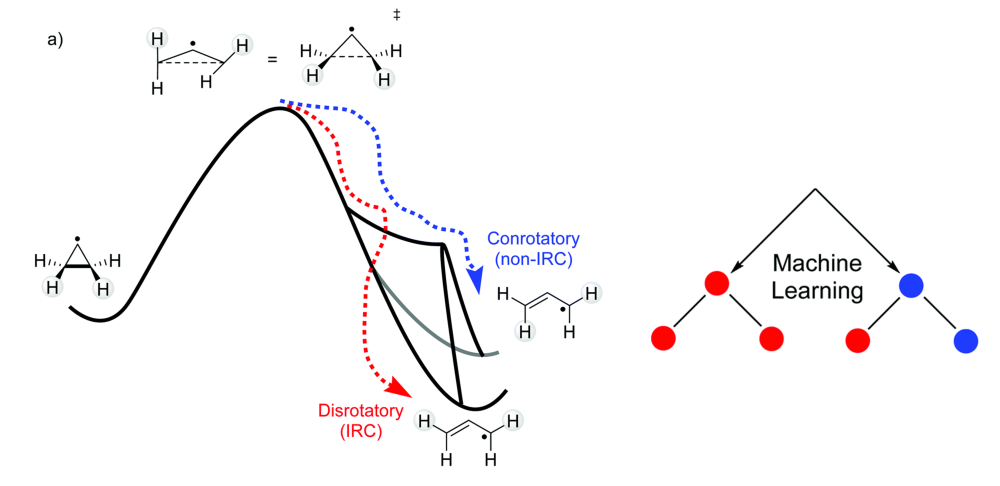

In [ ]:
!python -m robert --csv_name Classification.csv --y Outcome --names Name --type clas --train [60]

## Full workflow from SMILES
In this case, we are going to use the QDESCP module of AQME to calculate all the descriptors for us. To use this functionality, we only need to add the --aqme command in the command line. The CSV file only needs three columns: code_name, SMILES, and Target_value.

In [ ]:
!python -m robert --aqme --y solubility --csv_name solubility_short.csv --csearch_keywords "--sample 5"

## SMILES workflow with atomic properties
Following the previous example, we also have the possibility to change specific parameters of the QDESCP module. In this case, we are going to incorporate the calculation of atomic descriptors for an Ir atom that is present in all the SMILES in our database. The way to do this is by adding --qdescp_keywords "--qdescp_atoms ['Ir']" in the command line. In the CSV file, you can add specific columns to specify the charge, multiplicity, complex_type, or geometry.

In [ ]:
!python -m robert --aqme --y barrier --csv_name vaska_short.csv --qdescp_keywords "--qdescp_atoms ['Ir']" --csearch_keywords='--sample 2'

## EXERCISES
1) Use Robert_example.csv specifying 3 ML models different from the default ones.
2) Use Robert_example.csv deactivating the correlation filter of the CURATE module.
3) Use Robert_example.csv and change the error type used in the GENERATE module for the hyperoptimization.
4) Use Robert_example.csv and change the number of descriptors shown in the SHAP analysis.
5) Use solubility_short.csv and specify that we want to perform the AQME calculations using water as the solvent.
6) Use solubility_short.csv and specify that we want to perform the AQME conformational sampling using CREST with 5 conformers (use hpc)